<div width=50% style="display: block; margin: auto">
    <img src="figures/ucl-logo.svg" width=100%>
</div>

### [UCL-ELEC0136 Data Acquisition and Processing Systems 2024]()
University College London
# Lab 3: Data Processing #1


In this lab, we will use the _open-meteo_ API (https://open-meteo.com/), to acquire historical weather data for London from the past 2 years, inspect it, and prepare it for modelling.

### Objectives
* Learn to deal with **time series**
* Learn to **plot** and represent data
* **Normalise** your data
* Detect and handle **outliers** in time series

### Constraints
* You cannot use pre-existing functions to normalise your data or calculate statistics about it.
* This includes functions from `scipy`, `pandas` and other statistics library.
* This doesn't mean you cannot use `pandas`, but that you cannot use its stats functions (e.g., functions to calculate percentile)
* You must you `numpy` only to manipulate your data
* All data must be acquired through Python: you cannot download the data by browsing to the website and using the mouse 

<hr width=70% style="float: left">

### TASKS

<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 1: Acquiring data</h4>

* Create a function `acquire_data(latitude, longitude, start_date, end_date, features)` that acquires **daily** data for **London** between the **1st January 1950** and the **31st December 1954** (included)
* We are interested in the following **features**:
  * Mean Temperature (2 m)
  * Minimum Temperature (2 m)
  * Maximum Temperature (2 m)
  * Precipitation Sum
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* Use a WEB request to acquire the data (like for lab 1), the API endpoint is https://archive-api.open-meteo.com/v1/archive
* Take a look at the open-meteo docs https://open-meteo.com/en/docs/historical-weather-api to see which parameters to use
* Always specify a timezone (you can use `timezone=GMT`)

</div>


In [1]:
# constants
OPEN_METEO_API = "https://archive-api.open-meteo.com/v1/archive"

In [2]:
from typing import List
import requests


# create a function
def acquire_data(latitude: float, longitude: float, start_date: str, end_date: str, features: List[str]) -> dict:
    """
    Acquires data from the Open-meteo API for a given location and time period.
    The API endpoint is https://archive-api.open-meteo.com/v1/archive.

    Args:
        latitude (float): latitude of the location
        longitude (float): longitude of the location
        start_date (str): start date of the data in the format YYYY-MM-DD
        end_date (str): end date of the data in the format YYYY-MM-DD
        features (List[str]): list of features to be extracted from the API
    Returns:
        (dict): dictionary of data
    """
    global OPEN_METEO_API
    latitude_str, longitude_str = str(round(latitude, 2)), str(round(longitude, 2))
    features_str = ",".join(features)
    params = {
        "latitude": latitude_str,
        "longitude": longitude_str,
        "start_date": start_date,
        "end_date": end_date,
        "daily": features_str,
        "timezone": "GMT",
    }
    try:
        response = requests.get(OPEN_METEO_API, params=params)
    except Exception as e:
        raise e
    if response.status_code != 200:
        raise Exception(f"[{response.status_code}] Error: {response.url}")

    body = response.json()
    return body

<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 2: Handling data</h4>

* Run the function above to acquire the data
* Create a pandas dataframe from the acquired data
</div>

In [3]:
features = ["temperature_2m_max", "temperature_2m_min", "temperature_2m_mean", "precipitation_sum"]
response = acquire_data(51.5085, -0.1257, "2018-01-01", "2022-12-31", features=features)

In [4]:
import pandas as pd

In [5]:
time_series = pd.DataFrame(response["daily"])
time_series

,time,temperature_2m_max,temperature_2m_min,temperature_2m_mean,precipitation_sum
0,2018-01-01,7.3,4.6,5.9,0.7
1,2018-01-02,11.4,2.3,6.5,4.6
2,2018-01-03,11.8,6.4,8.2,2.8
3,2018-01-04,11.7,5.3,7.5,5.3
4,2018-01-05,8.2,2.4,5.7,0.8
...,...,...,...,...,...
1821,2022-12-27,9.4,1.9,5.9,2.3
1822,2022-12-28,11.2,9.8,10.2,4.0
1823,2022-12-29,9.1,5.2,7.7,0.0
1824,2022-12-30,12.4,5.1,9.4,6.5


<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 3: Plot your data</h4>

* Create a function `lineplot(x, y, title, x_label, y_label)` that creates a lineplot for the feature named `feature_name` and returns both the `Figure` and the `Axis` objects
* The function must return both the matplotlib `figure` object and the `axis` object
* Use the function to create two images containing plots of both the temperature and precipitations and save them to disk
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* Use `matplotlib` to create the plots
* Use the appropriate type of plot for the data that you want to visualise
* For example, you can use a lineplot to plot the average temperature
* Or, you can use a candlestick plot a shaded areaplot to plot min, max, and average temperature in the same figure

</div>


In [6]:
from numpy.typing import ArrayLike
import matplotlib.pyplot as plt


def lineplot(x: ArrayLike, y: ArrayLike, title: str, x_label: str, y_label: str) -> (plt.Figure, plt.Axes):
    """
    Creates a line plot for the given data, title and labels.

    Args:
        x (ArrayLike): value of the data on the x-axis
        y (ArrayLike): value of the data on the y-axis
        title (str): title of the plot
        x_label (str): x-axis label
        y_label (str): y-axis label
    Returns:
        (plt.Figure, plt.Axes): matplotlib figure and axes objects
    """
    fig, ax = plt.subplots(1, figsize=(30, 4))
    ax.plot(x, y)
    ax.margins(x=0)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_xticks(
        x[::20],
        x[::20],
        rotation=45,
    )
    return fig, ax

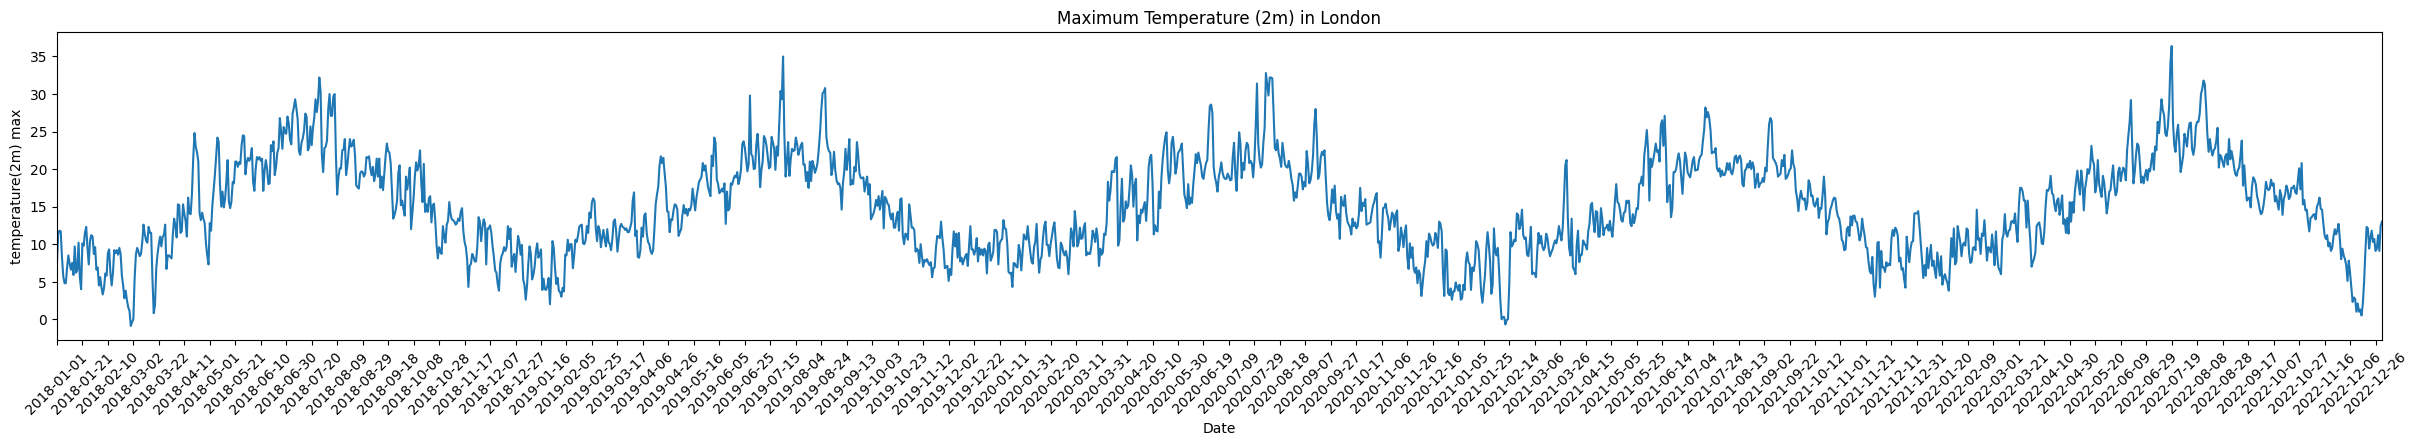

In [7]:
fig, ax = lineplot(
    time_series["time"],
    time_series["temperature_2m_max"],
    "Maximum Temperature (2m) in London",
    "Date",
    "temperature(2m) max",
)

<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 3.1: multivariate plots</h4>

* Create a function `lineplots(x, ys, title, x_label, y_label, legend)` that plot the two variables on the same graph and returns both the `Figure` and the `Axis` objects
* Add a legend
</div>

In [8]:
def lineplots(
    x: ArrayLike, ys: List[ArrayLike], title: str, x_label: str, y_label: str, legend: List[str]
) -> (plt.Figure, plt.Axes):
    """
    Creates a line plot for each list of data in the given list of data, title and labels.

    Args:
        x (ArrayLike): value of the data on the x-axis
        ys (List[ArrayLike]): list of values of the data on the y-axis
        title (str): title of the plot
        x_label (str): x-axis label
        y_label (str): y-axis label
        legend (List[str]): list of legend labels
    Returns:
        (plt.Figure, plt.Axes): matplotlib figure and axes objects
    """
    fig, ax = plt.subplots(1, figsize=(30, 4))
    for i in range(len(ys)):
        ax.plot(x, ys[i], label=legend[i])
    ax.margins(x=0)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.legend()
    ax.set_xticks(
        x[::20],
        x[::20],
        rotation=45,
    )
    return fig, ax

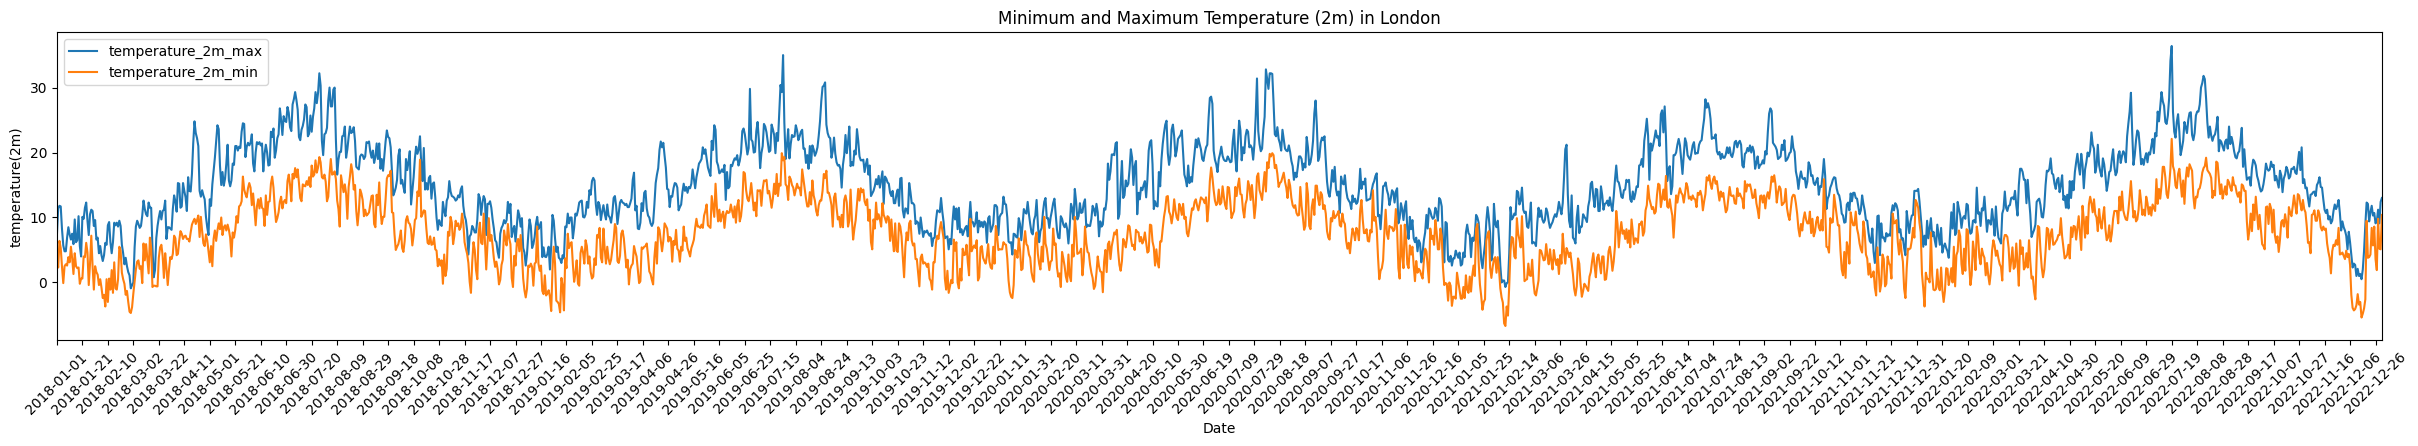

In [9]:
fig, ax = lineplots(
    time_series["time"],
    [time_series["temperature_2m_max"], time_series["temperature_2m_min"]],
    "Minimum and Maximum Temperature (2m) in London",
    "Date",
    "temperature(2m)",
    ["temperature_2m_max", "temperature_2m_min"],
)

<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 3.2: Plot with additional statistics</h4>

* Create a shaded area plot, where the mean temperature is the central line, and the minimum, and the maximum are the lower and upper bounds of the shaded area.
* The function should return both the `Figure` and the `Axis` objects
* The shaded area must be 0.3 opacity
* See https://swdevnotes.com/python/2020/display-line-chart-range/ for an example output
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* You can modify existing plots by reusing the `axis`
* For example, running `ax.plot` on an axis that already contains another plot, adds a plot on top of it

</div>


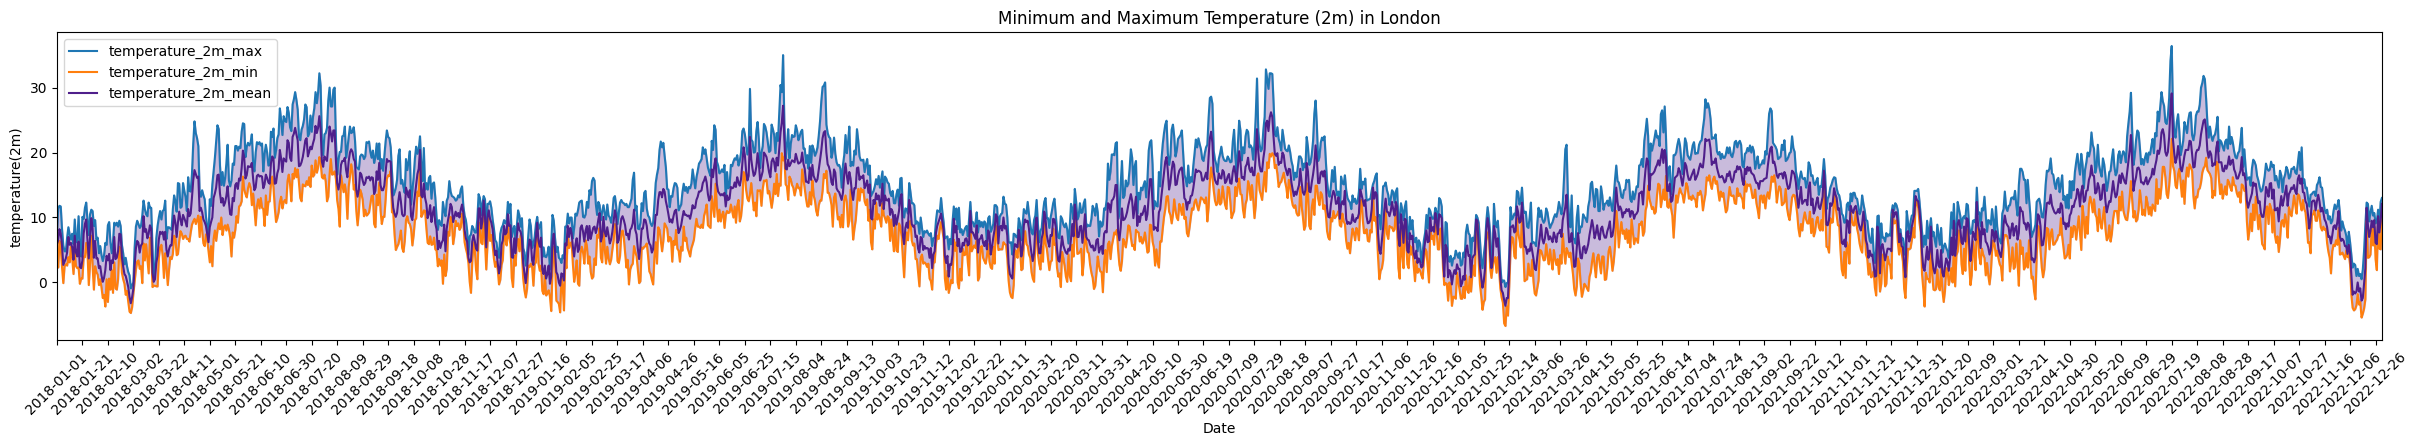

In [10]:
clr = plt.cm.Purples(0.9)
ax.plot(time_series["time"], time_series["temperature_2m_mean"], label="temperature_2m_mean", color=clr)
ax.fill_between(
    time_series["time"],
    time_series["temperature_2m_min"],
    time_series["temperature_2m_max"],
    alpha=0.3,
    edgecolor=clr,
    facecolor=clr,
)
ax.legend()
fig

<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 4: Normalising your data</h4>

* Create a function `minmax_norm(x)` that takes the acquired data, normalises the data using Min-Max normalisation only using `numpy`
* The function should returns an array containing the normalised data
* Normalise the `temperature_2m_mean` feature
* Plot the normalised data over the non-normalised one in the same plot
</div>

In [11]:
import numpy as np


def minmax_norm(x: ArrayLike) -> ArrayLike:
    """
    Normalises the data between 0 and 1 using the min-max normalization.

    Args:
        x (ArrayLike): data to be normalized
    Returns:
        (ArrayLike): normalized data
    """
    res = (x - np.min(x)) / (np.max(x) - np.min(x))
    return res

In [12]:
minmax_norm_temperature_2m_mean = minmax_norm(time_series["temperature_2m_mean"])
minmax_norm_temperature_2m_mean

0       0.290520
1       0.308869
2       0.360856
3       0.339450
4       0.284404
          ...   
1821    0.290520
1822    0.422018
1823    0.345566
1824    0.397554
1825    0.480122
Name: temperature_2m_mean, Length: 1826, dtype: float64

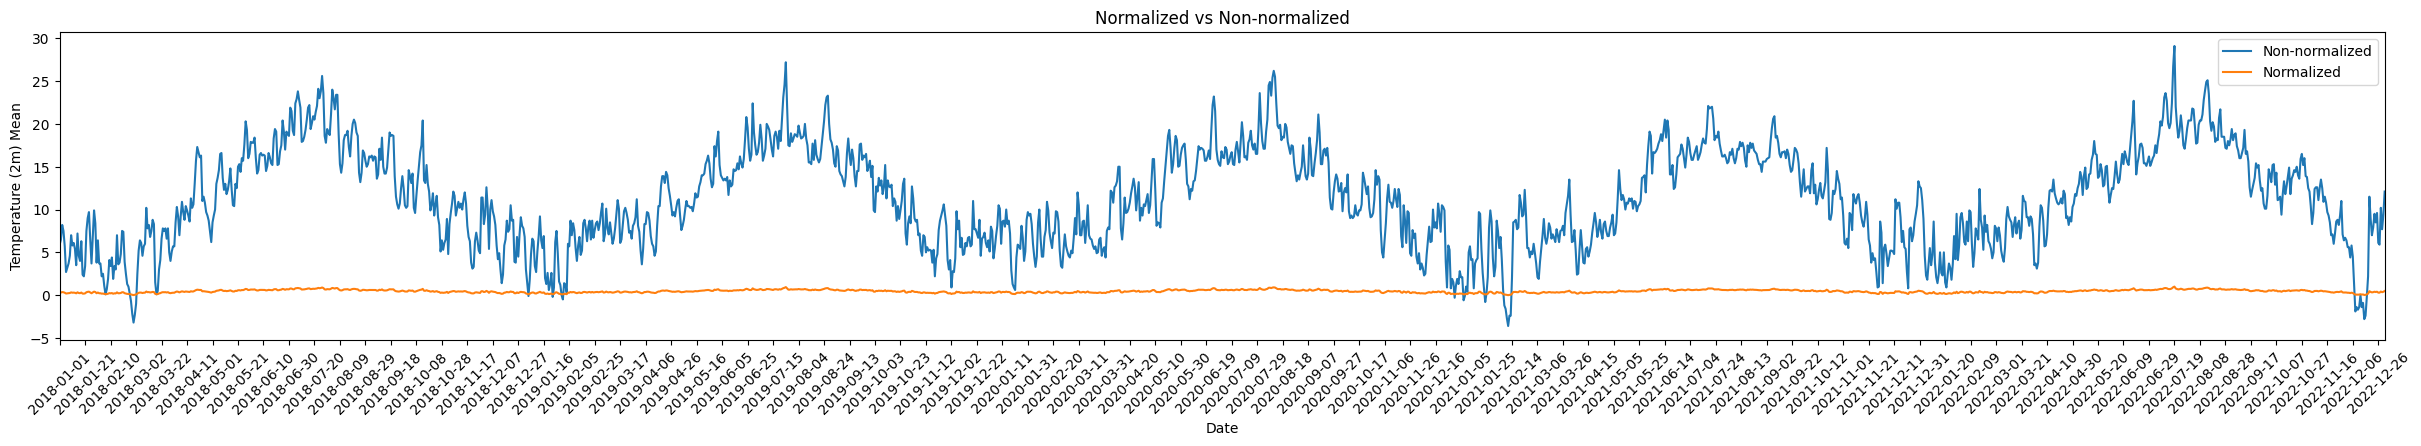

In [13]:
fig, ax = lineplots(
    time_series["time"],
    [time_series["temperature_2m_mean"], minmax_norm_temperature_2m_mean],
    "Normalized vs Non-normalized",
    "Date",
    "Temperature (2m) Mean",
    ["Non-normalized", "Normalized"],
)

<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 4.1: Z-score normalisation</h4>

* Create a function `zscore_norm(x)` that takes a pandas series and normalises it using the z-score.
* The function should returns an array containing the normalised data
* Normalise the `temperature_2m_mean` feature
* Plot the normalised data over the non-normalised one in the same plot
</div>

In [14]:
def zscore_norm(x: ArrayLike) -> ArrayLike:
    """
    Normalises the data using the z-score normalization.

    Args:
        x (ArrayLike): data to be normalized
    Returns:
        (ArrayLike): normalized data
    """
    res = (x - np.mean(x)) / np.std(x)
    return res

In [15]:
zscore_norm_temperature_2m_mean = zscore_norm(time_series["temperature_2m_mean"])
zscore_norm_temperature_2m_mean

0      -0.953165
1      -0.847153
2      -0.546784
3      -0.670465
4      -0.988503
          ...   
1821   -0.953165
1822   -0.193408
1823   -0.635128
1824   -0.334758
1825    0.142298
Name: temperature_2m_mean, Length: 1826, dtype: float64

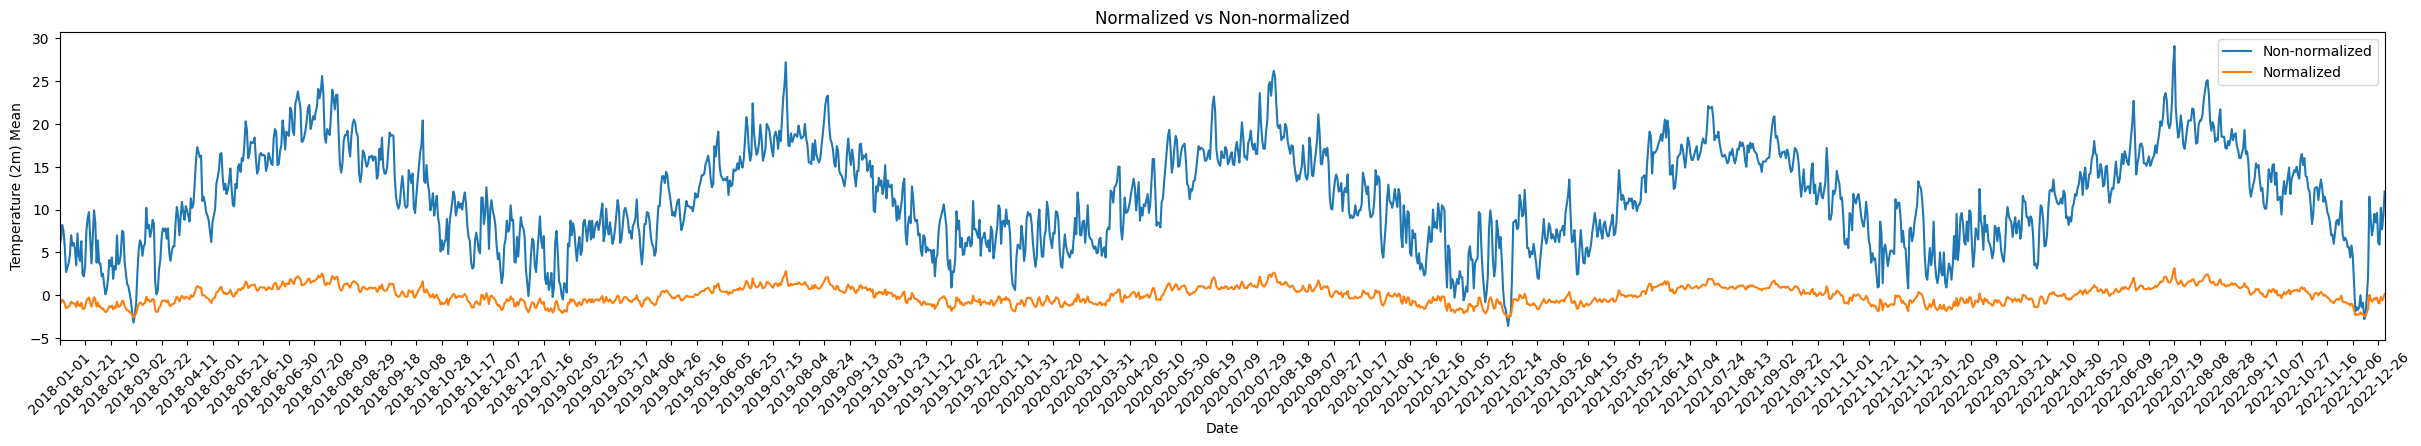

In [16]:
fig, ax = lineplots(
    time_series["time"],
    [time_series["temperature_2m_mean"], zscore_norm_temperature_2m_mean],
    "Normalized vs Non-normalized",
    "Date",
    "Temperature (2m) Mean",
    ["Non-normalized", "Normalized"],
)

<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 5: Outliers detection</h4>

* Create a function `zscore_outliers(x, threshold=3)` that takes the acquired data, checks if each data point is an outliers by verifying that its z-score is greater than `threshold`
* The function must return the index of the outliers
* Check for outliers in `temperature_2m_mean`
</div>

In [17]:
def zscore_outliers(x: ArrayLike, threshold: int = 3) -> ArrayLike:
    """
    Detects outliers using the z-score method and returns the indices of the outliers.

    Args:
        x (ArrayLike): data to be checked for outliers
        threshold (int): threshold for the z-score method

    Returns:
        (ArrayLike): indices of the outliers
    """
    norm_x = zscore_norm(x)
    res = np.where(np.logical_or(norm_x < -threshold, norm_x > threshold))
    outliers = res[0]
    return outliers

In [18]:
zscore_outliers(time_series["temperature_2m_mean"], 3)

array([1660])

<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 5.1: Plotting outliers</h4>

* Create a function `mark_outliers(ax, idx)` that marks the outliers with a red dot
* The function should return the `Figure` and the `Axis` object containing the plot
* Plot the data with the marked outliers
</div>

In [19]:
def mark_outliers(ax: plt.Axes, x: ArrayLike, y: ArrayLike, outliers_idx: ArrayLike) -> plt.Axes:
    """
    Plots red circles around the outliers in a certain line plot.

    Args:
        ax (plt.Axis): the older axis to plot on that contains the original line plot
        x (ArrayLike): the x-data for the line plot
        y (ArrayLike): the y-data for the line plot
        outliers_idx (ArrayLike): indices of the outliers
    """
    outliers_x = x[outliers_idx]
    outliers_y = y[outliers_idx]
    ax.scatter(outliers_x, outliers_y, color="red")
    return ax

[1660]


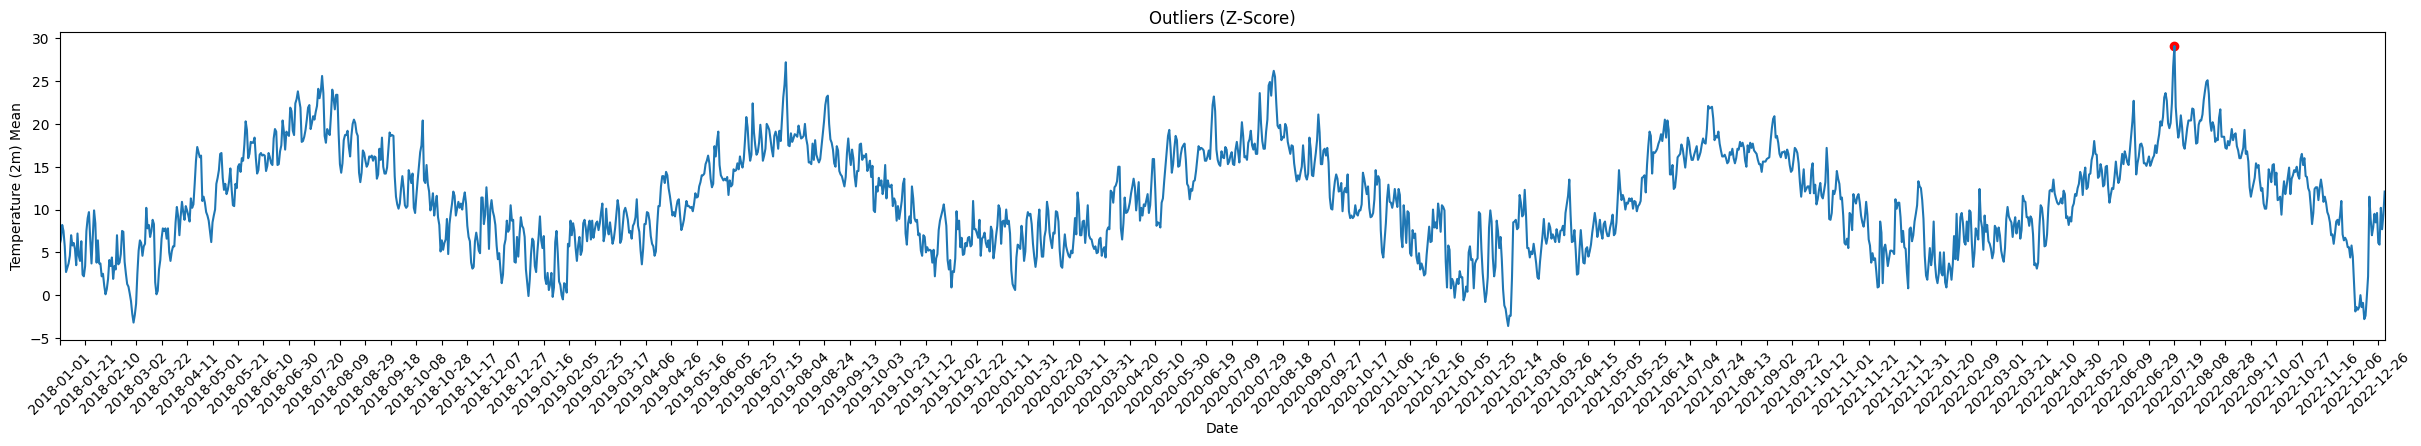

In [20]:
x = time_series["time"]
y = time_series["temperature_2m_mean"]

# Set threshold as 3
temperature_2m_mean_zscore_outliers_idx = zscore_outliers(time_series["temperature_2m_mean"], 3)
print(temperature_2m_mean_zscore_outliers_idx)
fig, ax = lineplot(x, y, "Outliers (Z-Score)", "Date", "Temperature (2m) Mean")
ax = mark_outliers(ax, x, y, temperature_2m_mean_zscore_outliers_idx)

<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 5.3: Detect outliers using the IQR method </h4>

* Create a function `iqr_detect(x, threshold=1.5)` that returns the indices of the outliers in the original data according to the **IQR** method
* Plot the data with the marked outliers
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* You can use `np.quantile` to get the quantile of a uniform, discrete distrbution

</div>


In [21]:
def iqr_detect(x: ArrayLike, threshold: float = 1.5) -> ArrayLike:
    """
    Detects outliers using the interquantile range method and returns the indices of the outliers.

    Args:
        x (ArrayLike): data to be checked for outliers
        threshold (float): threshold for the interquantile range method

    Returns:
        (ArrayLike): indices of the outliers
    """
    q1, q3 = np.percentile(x, 25), np.percentile(x, 75)
    iqr = q3 - q1
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    res = np.where(np.logical_or(x < lower_bound, x > upper_bound))
    outliers = res[0]
    return outliers

[]


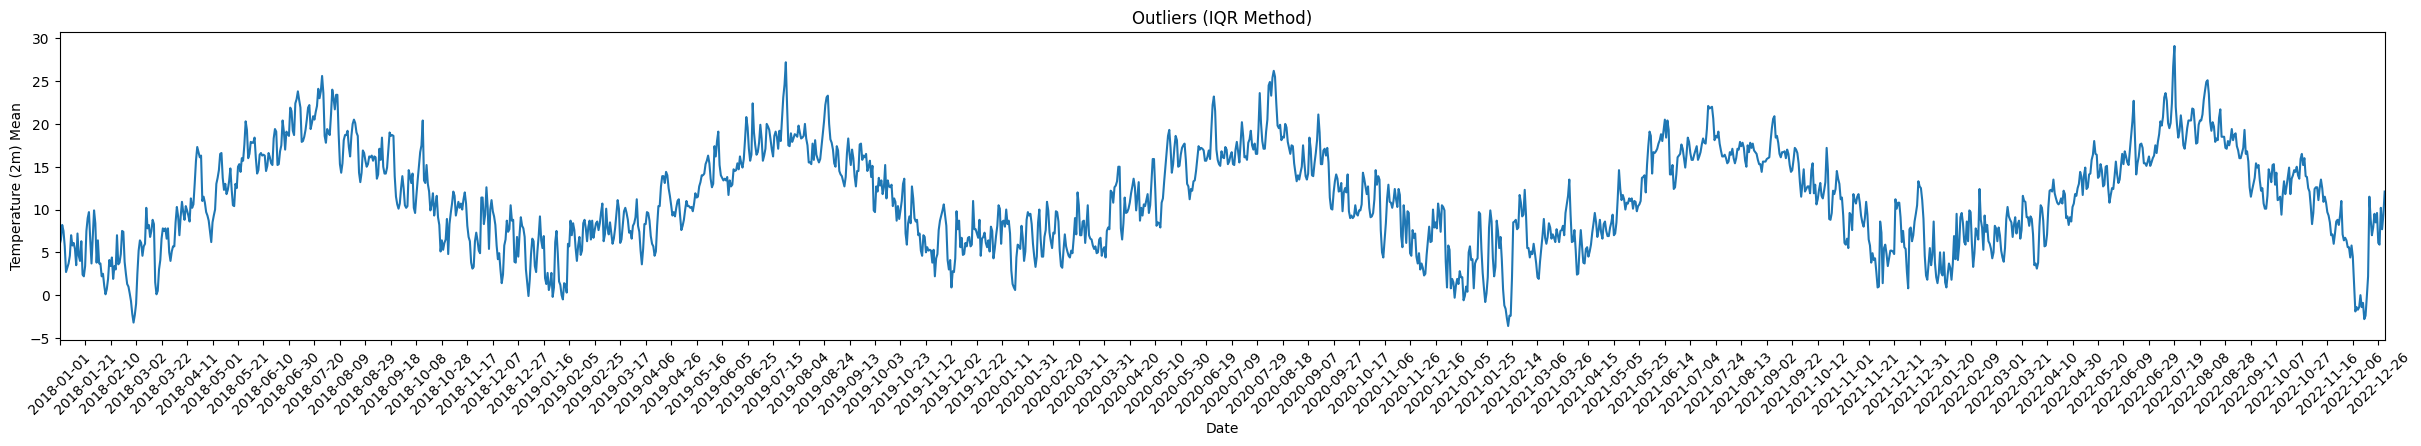

In [22]:
x = time_series["time"]
y = time_series["temperature_2m_mean"]

# Set threshold as 1.5
temperature_2m_mean_iqr_outliers_idx = iqr_detect(y, 1.5)
# It seems that there is no outliers while threshold = 1.5
print(temperature_2m_mean_iqr_outliers_idx)
fig, ax = lineplot(x, y, "Outliers (IQR Method)", "Date", "Temperature (2m) Mean")
ax = mark_outliers(ax, x, y, temperature_2m_mean_iqr_outliers_idx)

<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 6: Clamping outliers</h4>

* One way to deal with outliers is to compress them into a range of acceptable values
* Create a function `zscore_clamp(x, threshold=3)` that clamps the outliers into the range between 10th percentile and 90th percentile
* The function should return a numpy array containing the clamped data
* Plot the non-clamped data over the clamped one
  
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* Not every outlier is bad!! For example in financial problems, such as stock prediction, outliers is **exactly** what you are looking for
* **Removing outliers in that case might not benefit our analysis**
* Always make an **informed** decision whether to remove outliers and always **justify** it

</div>


In [23]:
def zscore_clamp(x: ArrayLike, threshold: int = 3) -> ArrayLike:
    """
    Clamps outliers using the z-score method and returns the clamped data.

    Args:
        x (ArrayLike): data to be clamped
        threshold (int): threshold for the z-score method

    Returns:
        (ArrayLike): clamped data
    """
    x_mean, x_std = np.mean(x), np.std(x)
    lower_bound = x_mean - threshold * x_std
    upper_bound = x_mean + threshold * x_std
    res = np.clip(x, lower_bound, upper_bound)
    return res

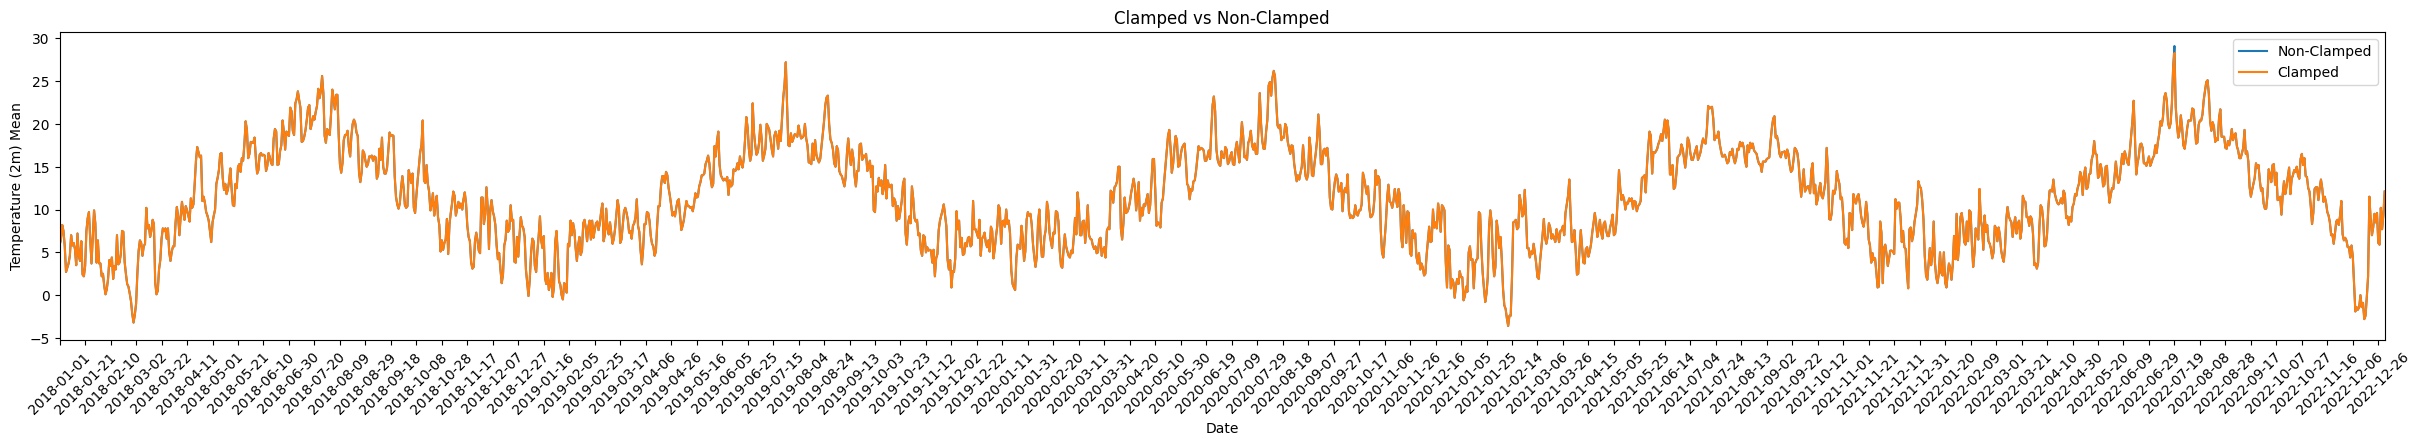

In [24]:
x = time_series["time"]
y = time_series["temperature_2m_mean"]
clamped_y = zscore_clamp(y)

fig, ax = lineplots(
    x, [y, clamped_y], "Clamped vs Non-Clamped", "Date", "Temperature (2m) Mean", ["Non-Clamped", "Clamped"]
)

<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 6.1: Replace outliers by n-degree interpolation </h4>

* Create a function `zscore_interp(x, time, threshold=3, deg=3)` that replaces the z-score outliers with values from a polynomial fit on clean data
* The function should return a numpy array containing the interpolated data
* Plot the data before and after replacing outliers
* Experiment with different value of `deg`, e.g., `1`, `3`, `11`, and `23`
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* You can index a numpy array with another numpy array of boolean values
* This will return only the values at which the index is `True`
* Try using this method to get only the clean data (that without outliers)
</div>


In [25]:
def zscore_interp(x: ArrayLike, y: ArrayLike, threshold: int = 3, deg: int = 1) -> ArrayLike:
    """
    Interpolates outliers using the z-score method and returns the interpolated data using a `deg`-degree approximation.

    Args:
        x (ArrayLike): x-variate of data to be interpolated
        y (ArrayLike): y-variate of data to be interpolated
        threshold (int): threshold for the z-score method
        deg (int): degree of the polynomial approximation

    Returns:
        (ArrayLike): interpolated data
    """
    y_mean = np.mean(y)
    y_std = np.std(y)
    lower_bound = y_mean - threshold * y_std
    upper_bound = y_mean + threshold * y_std

    is_outlier = np.logical_or(y < lower_bound, y > upper_bound)

    non_outliers_x_index, non_outliers_y = x.index[~is_outlier], y[~is_outlier]

    params = np.polyfit(non_outliers_x_index, non_outliers_y, deg=deg)
    f = np.poly1d(params)

    res = np.copy(y)
    # print(f(x.index[is_outlier]))
    res[is_outlier] = f(x.index[is_outlier])
    return res

/var/folders/z5/91g7p8b55m5bw2mvj70tl_jr0000gn/T/ipykernel_69365/2685440997.py:23: RankWarning: Polyfit may be poorly conditioned
  params = np.polyfit(non_outliers_x_index, non_outliers_y, deg=deg)


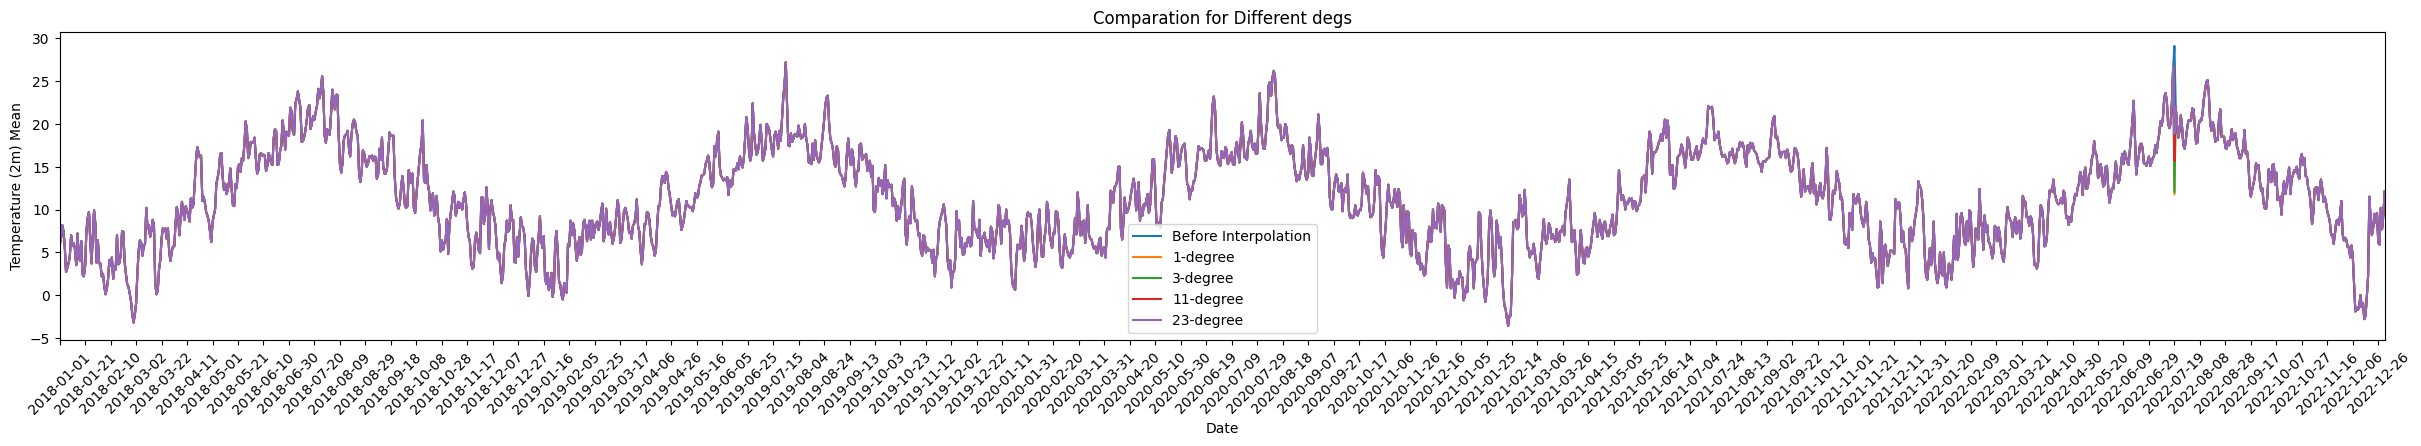

In [26]:
x = time_series["time"]
y = time_series["temperature_2m_mean"]

degs = [1, 3, 11, 23]
ys = [y] + [zscore_interp(x, y, 3, deg) for deg in degs]
legends = ["Before Interpolation"] + [f"{deg}-degree" for deg in degs]

fig, ax = lineplots(x, ys, "Comparation for Different degs", "Date", "Temperature (2m) Mean", legends)

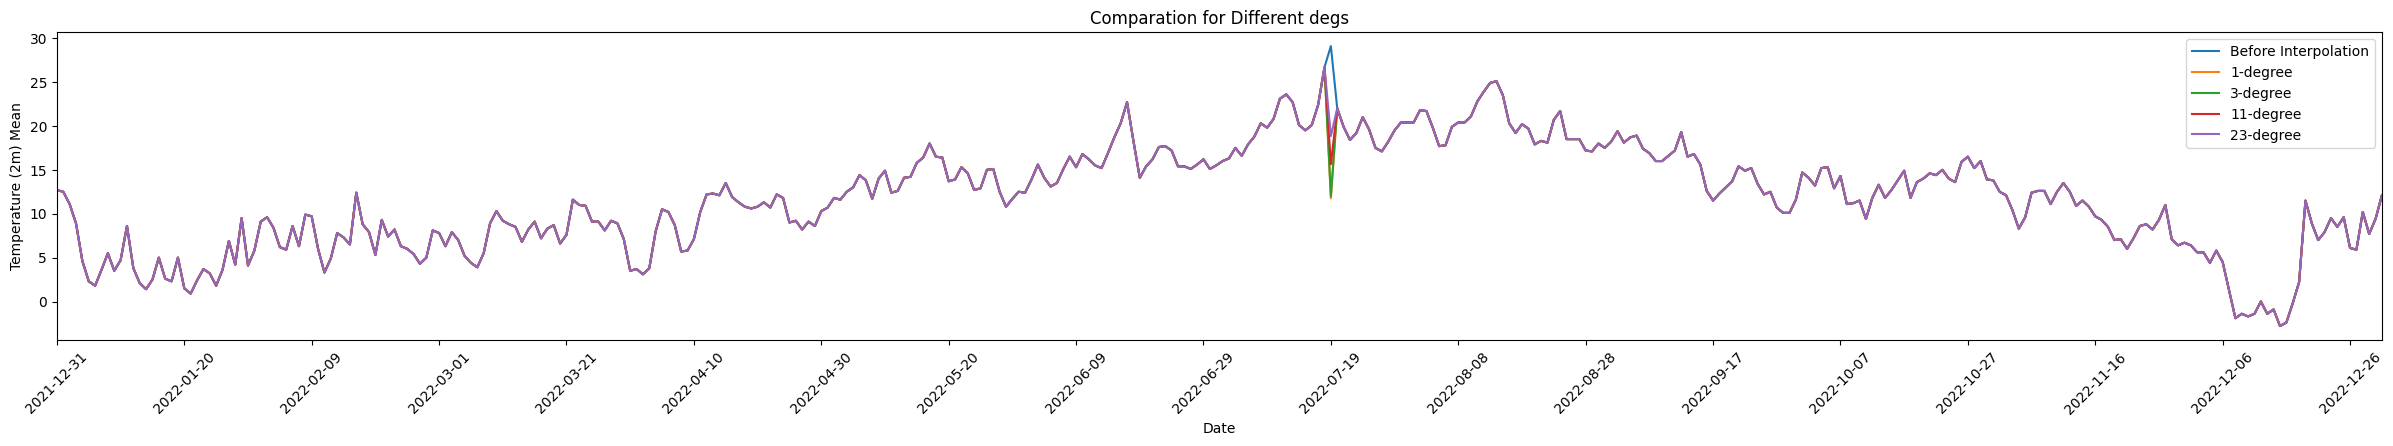

In [27]:
# only display the final year's data
length = len(x)
final_year_x = x[(length // 5) * 4 :]
final_year_ys = [y[(length // 5) * 4 :] for y in ys]
legends = ["Before Interpolation"] + [f"{deg}-degree" for deg in degs]

fig, ax = lineplots(
    final_year_x, final_year_ys, "Comparation for Different degs", "Date", "Temperature (2m) Mean", legends
)